## Double Insertion Mutation Hydrogen Proximity Analysis

Some preliminary work on analyzing the PDB files given to use by Filip Jagodzinski in which we will analyze the effect of hydrogen bond distances with double mutations on a variety of proteins.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

donor_dict = {
    "ALA": 12,
    "ARG": 31,
    "ASN": 20,
    "ASP": 4,
    "CYS": 5,
    "GLN": 11,
    "GLU": 6,
    "GLY": 30,
    "HIS": 4,
    "ILE": 39,
    "LEU": 33,
    "LYS": 24,
    "MET": 4,
    "THR": 16,
    "TRP": 4,
    "TYR": 4,
    "VAL": 24
}

In [2]:
accept_dict = {
    "ALA": 14,
    "ARG": 18,
    "ASN": 8,
    "ASP": 16,
    "GLN": 12,
    "GLU": 24,
    "GLY": 26,
    "HIS": 4,
    "ILE": 37,
    "LEU": 20,
    "LYS": 15,
    "MET": 4,
    "PRO": 9,
    "THR": 27,
    "TRP": 7,
    "TYR": 8,
    "VAL": 22
}

In [3]:
amino_acid_codes = {
    "ALA": "A", "ARG": "R", "ASN": "N", "ASP": "D",
    "CYS": "C", "GLN": "Q", "GLU": "E", "GLY": "G",
    "HIS": "H", "ILE": "I", "LEU": "L", "LYS": "K",
    "MET": "M", "PHE": "F", "PRO": "P", "SER": "S",
    "THR": "T", "TRP": "W", "TYR": "Y", "VAL": "V"
}

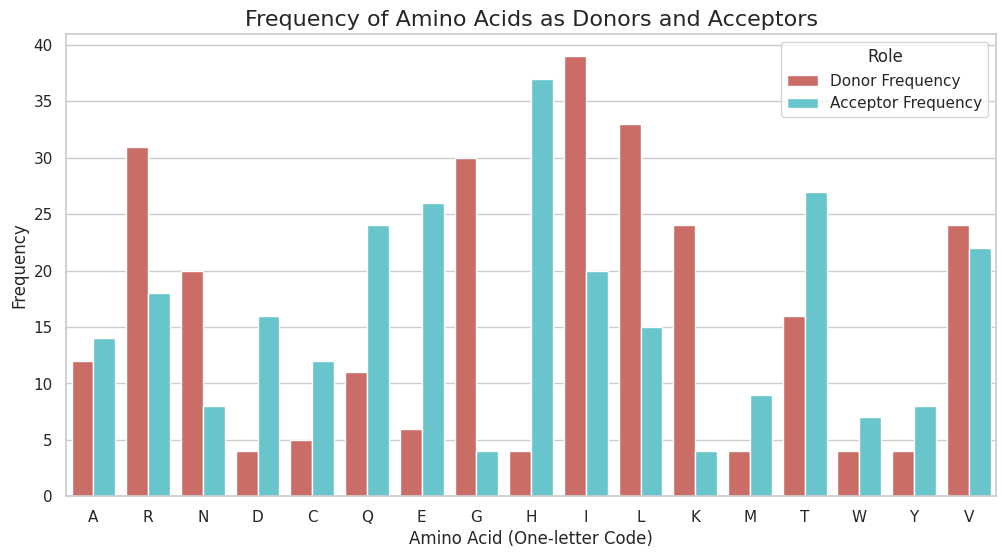

In [4]:
# conversion to one letter codes (could have just done this in the dict but we might need 3 letter codes for reference)
donor_one_letter = {amino_acid_codes[key]: value for key, value in donor_dict.items()}
acceptor_one_letter = {amino_acid_codes[key]: value for key, value in accept_dict.items()}

# create dataframe
data = pd.DataFrame({
    "Amino Acid": list(donor_one_letter.keys()),
    "Donor Frequency": list(donor_one_letter.values()),
    "Acceptor Frequency": list(acceptor_one_letter.values())
}).melt(id_vars=["Amino Acid"], var_name="Role", value_name="Frequency")

# grouped bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Amino Acid", y="Frequency", hue="Role", data=data, palette="hls")
plt.title("Frequency of Amino Acids as Donors and Acceptors", fontsize=16)
plt.xlabel("Amino Acid (One-letter Code)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Role")
plt.show()

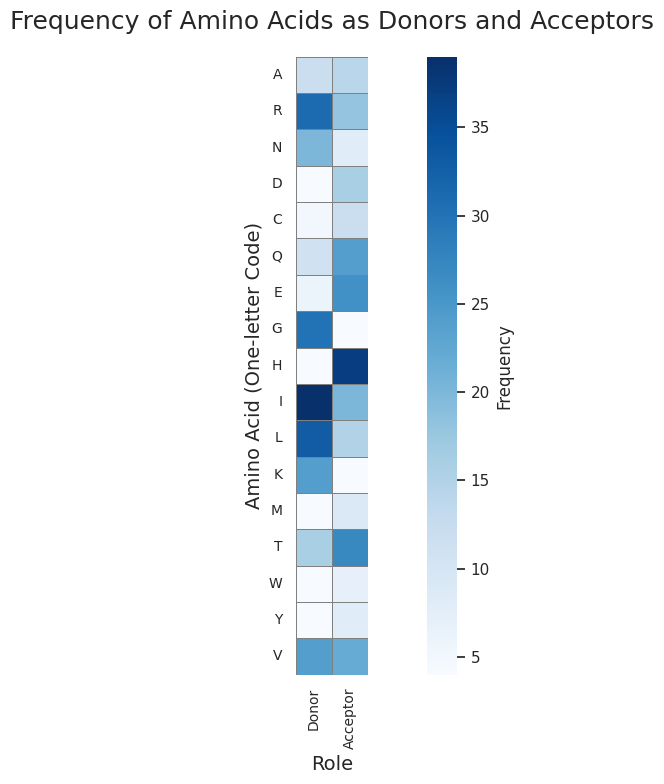

In [5]:
# matrix for heatmap
heatmap_data = pd.DataFrame({
    "Donor": list(donor_one_letter.values()),
    "Acceptor": list(acceptor_one_letter.values())
}, index=list(donor_one_letter.keys()))

# create heatmap
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

heatmap = sns.heatmap(
    heatmap_data,
    annot=False,
    cmap="Blues",
    cbar_kws={'label': 'Frequency'},
    linewidths=0.5,
    linecolor="gray",
    square=True
)

# titles/labels
plt.title("Frequency of Amino Acids as Donors and Acceptors", fontsize=18, pad=20)
plt.xlabel("Role", fontsize=14)
plt.ylabel("Amino Acid (One-letter Code)", fontsize=14)

# adjusting font
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
# plt.subplots_adjust(bottom=0.5)

plt.tight_layout()
plt.show()

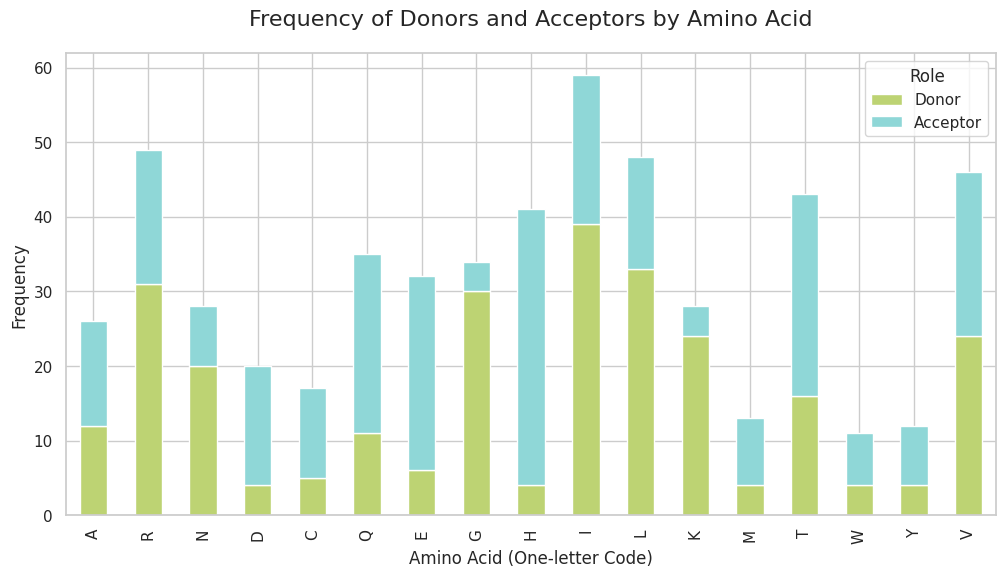

In [6]:
# Create DataFrame for stacked bar plot
stacked_data = pd.DataFrame({
    "Donor": list(donor_one_letter.values()),
    "Acceptor": list(acceptor_one_letter.values())
}, index=list(donor_one_letter.keys()))

# Plot stacked bar chart
stacked_data.plot(kind="bar", stacked=True, figsize=(12, 6), color=["#bdd373", "#8fd7d7"])
plt.title("Frequency of Donors and Acceptors by Amino Acid", fontsize=16, pad=20)
plt.xlabel("Amino Acid (One-letter Code)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Role")

# plt.xticks(rotation=90)

plt.show()

# Initial Results Work
We are taking in the output from our program that returns the specific location of the mutation as well as a series of distances correlating with that mutation that represent the midpoint of a hydrogen bond to the Carbon Atom of the mutation.



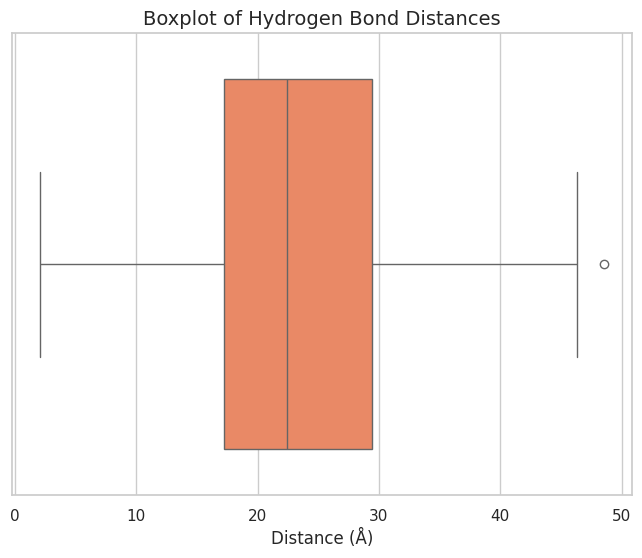

In [7]:
import requests
#url for the raw github output.txt
url = 'https://raw.githubusercontent.com/BorisWeinfurt/DIMHPA/refs/heads/main/sample_output.txt'

response = requests.get(url)
response.raise_for_status()

# split on new line, split into "pieces" on that line, turn all values 5th value and longer into floats and store
data = []
for line in response.text.split('\n'):
  piece = line.split()
  distances = list(map(float, piece[4:]))
  data.extend(distances)

# create the dataframe of the distances
df = pd.DataFrame(data, columns=["Distance"])

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Distance"], color="coral")
plt.title("Boxplot of Hydrogen Bond Distances", fontsize=14)
plt.xlabel("Distance (Å)", fontsize=12)
plt.show()

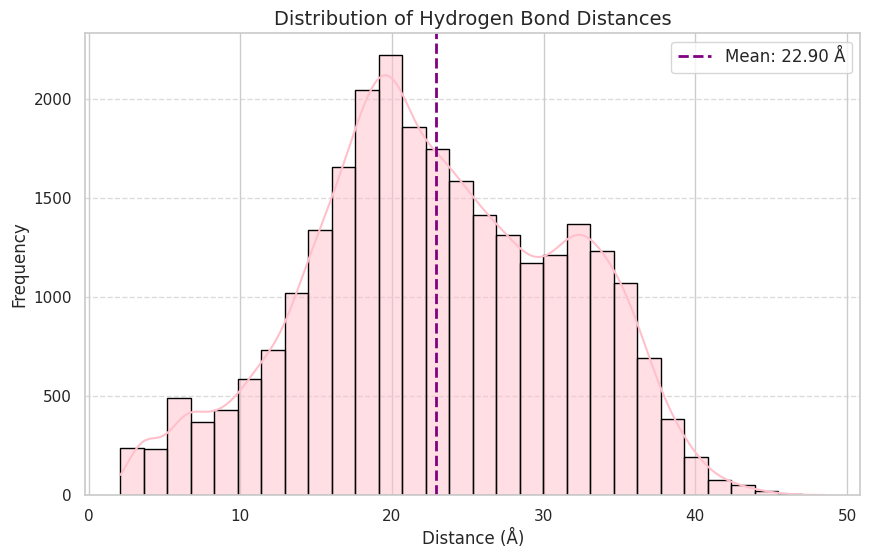

In [8]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
sns.histplot(df["Distance"], bins=30, kde=True, color="pink", edgecolor="black")
mean = df["Distance"].mean()
plt.axvline(mean, color="purple", linestyle="dashed", linewidth=2, label=f"Mean: {mean:.2f} Å")
plt.title("Distribution of Hydrogen Bond Distances", fontsize=14)
plt.xlabel("Distance (Å)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc="upper right")
plt.show()

In [9]:
df

,Distance
0,4.896067
1,8.107390
2,10.307017
3,10.810573
4,12.882243
...,...
26742,19.503654
26743,18.452951
26744,15.563002
26745,17.703130


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

file_path = "/content/drive/My Drive/sample_output.txt"
output_file = "processed_sample_output.csv"

longest_line = -1
pandas_data = []

with open(file_path, "r") as f:
    lines = f.readlines()
    for line in lines:
        split_line = line.split(" ")
        split_line[-1] = split_line[-1].strip("\n")
        if len(split_line) > longest_line:
            longest_line = len(split_line)
        pandas_data.append(split_line)

# make headings dynamically since some columns differ in length using extend
headings = ["Insertion Location 1", "Residue 1", "Insertion Location 2", "Residue 2"]
headings.extend([f"Hbond distance {i}" for i in range(longest_line - 4)])

# dataframe and csv conversion
df = pd.DataFrame(pandas_data, columns=headings)
df.to_csv(output_file, index=False)



Processed file saved as processed_sample_output.csv


In [6]:
df

,Insertion Location 1,Residue 1,Insertion Location 2,Residue 2,Hbond distance 0,Hbond distance 1,Hbond distance 2,Hbond distance 3,Hbond distance 4,Hbond distance 5,...,Hbond distance 61,Hbond distance 62,Hbond distance 63,Hbond distance 64,Hbond distance 65,Hbond distance 66,Hbond distance 67,Hbond distance 68,Hbond distance 69,Hbond distance 70
0,1,C,2,E,4.896067146189887,8.107389869742295,10.307017002993636,10.810572903412664,12.882243263500344,14.212054346574954,...,20.72556815867782,20.833703445379072,18.82242499653007,16.7324527042511,18.581749984864185,13.86017080522459,None,None,None,None
1,1,D,2,M,3.5804570239007165,5.898616384373539,14.654515464524914,15.296095604761367,16.526680444057718,18.602385290601845,...,18.663183028358265,15.771183833181322,17.644468439145452,10.840058982773112,None,None,None,None,None,None
2,1,L,2,E,3.83695823537343,3.7684841448518727,6.258444934646305,6.899613286264672,7.972265079637026,11.658321470091648,...,21.713379527378958,22.616922944998503,22.908768435906797,21.230732647508887,19.319409708891204,21.439119070055092,16.706829464323864,None,None,None
3,1,K,2,M,3.7593833935899665,5.313661308363564,6.219412552645143,7.803766446402663,8.423718745304827,10.190240453492743,...,16.367379799466985,17.02795579334172,17.127110300631564,15.815784607473635,13.34910643076906,15.57702209987519,10.402014648614953,None,None,None
4,1,R,2,E,6.091290955126015,6.508109729406844,9.589224916540442,10.95835985674864,10.485218333444468,12.06576841730356,...,16.234192827178074,14.38247348337552,16.034117515473064,12.479852833667554,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,C,2,K,3.5512274638496537,5.865413924012523,5.952358146146786,7.786578837975004,8.923766763536577,16.755119023749135,...,22.090079594695897,22.372896761483528,21.970451548614104,22.299154933539523,18.751329059562682,20.984678994447357,11.699126409694017,None,None,None
396,1,E,2,S,3.916870976940644,3.8643242941036906,6.406062616771701,7.898909260144716,9.567307941631228,13.796802437521523,...,24.83429122201799,25.742097340737402,26.011085968294353,24.714148756329838,22.536003538782108,24.778071081099107,19.029067311615666,None,None,None
397,1,D,2,C,5.534603554004564,6.443901302782339,7.915272500046978,8.693641325704668,9.454231288158754,10.582379859936987,...,18.05787081856551,18.887995724798326,19.164206225408858,16.976367065718147,15.390326393549936,17.28720427078942,13.274630569247494,None,None,None
398,1,L,2,K,3.9919691256321097,5.290238132636372,5.536328995823859,6.4917232496464266,8.768887472193947,10.32449371640082,...,16.342312672935858,16.992135607392026,17.08494305668005,15.707729522435761,13.260268643583354,15.45705494264674,10.364660763864876,None,None,None
